# 프로젝트: 주식 예측 
## 목차
* 시계열 예측 연습
* 프로젝트(데이터셋1 - 삼성전자)
* 프로젝트(데이터셋2 - 현대자동차)
* 프로젝트(데이터셋3 - 포스코)
* 프로젝트(데이터셋4 - 포스코 전체기간)
<br>

`제조업은 비슷한 시장 영향을 받는다는 개인적인 생각때문에 우리나라 대표적인 제조업 회사인 삼전, 현차, 포스코의 주식을 대상 데이터셋으로 잡았습니다. 그리고 전체 데이터를 받아오면 어떻게 되는지 최종적으로 확인하기 위해 전체기간을 기준으로 포스코의 주식을 예측해보았습니다. 이때, COVID19로 인해 2019년 4분기 이후, 전체 산업군이 급감한 점을 고려해서 2019년 혹은, 2020년 초중반까지 자료를 활용했습니다.`
<br>

* 사용 모델: [ARIMA](https://alkaline-ml.com/pmdarima/tips_and_tricks.html#understand-p-d-and-q)

## 시계열 예측 연습
### 학습목표 
* 시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념을 이해한다.
* ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용해 본다.
* 실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인해 본다.

### 시계열 데이터 살펴보기 - 예제1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print('슝=3')

슝=3


In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

### 시계열 안정성(Stationarity)의 정성적 분석 

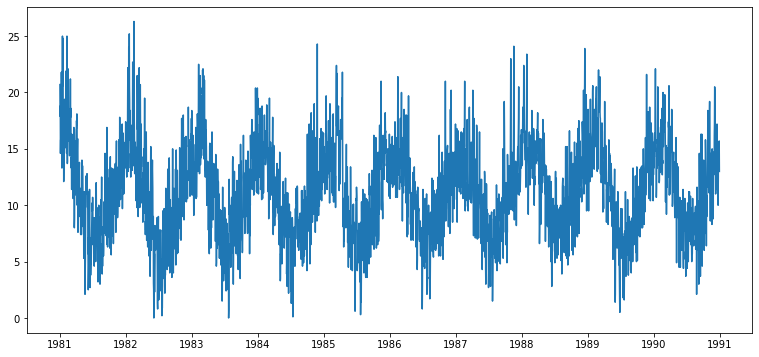

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [6]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

Series([], Name: Temp, dtype: float64)


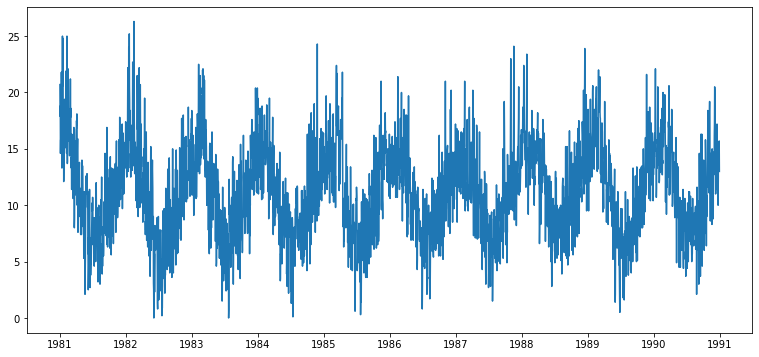

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있다.

In [8]:
#일정 시간 내 구간 통계치(Rolling Statistics)를 시각화
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


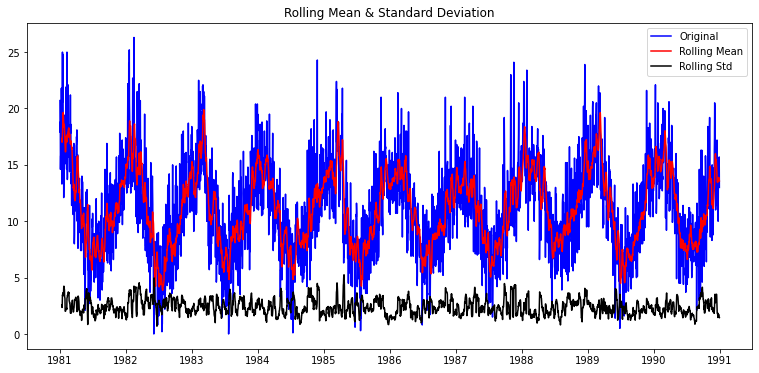

In [9]:
plot_rolling_statistics(ts1, window=12)

In [10]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


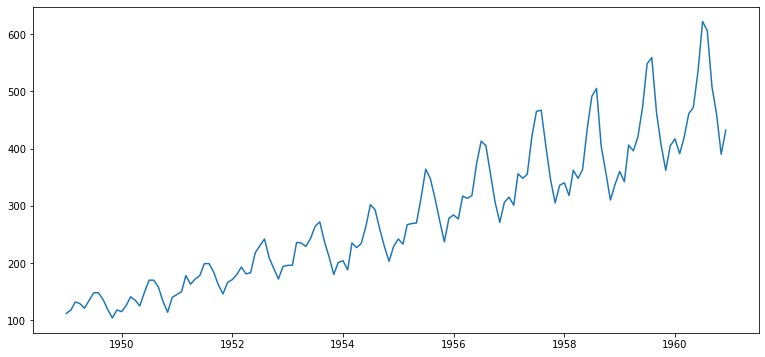

In [11]:
ts2 = df['Passengers']
plt.plot(ts2)

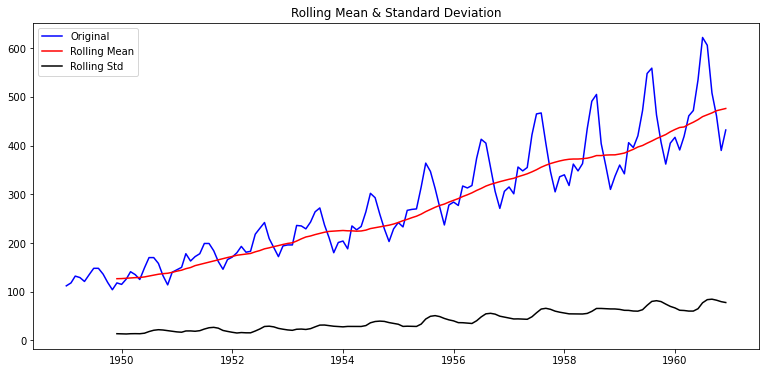

In [12]:
plot_rolling_statistics(ts2, window=12)

## 시계열 데이터 살펴보기 - 예제2
* 데이터셋: International airline passengers

In [13]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


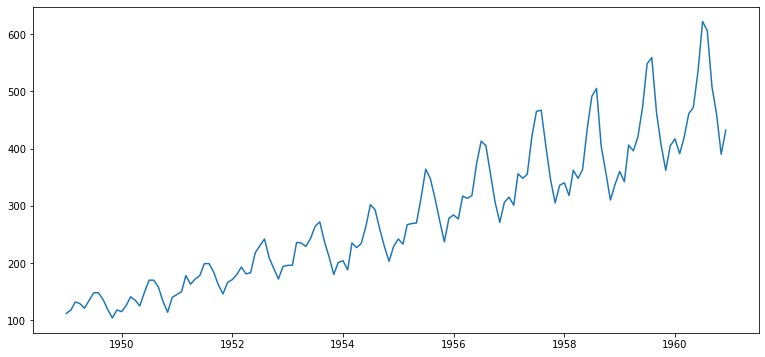

In [14]:
ts2 = df['Passengers']
plt.plot(ts2)

In [15]:
ts2[ts2.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Passengers, dtype: int64)

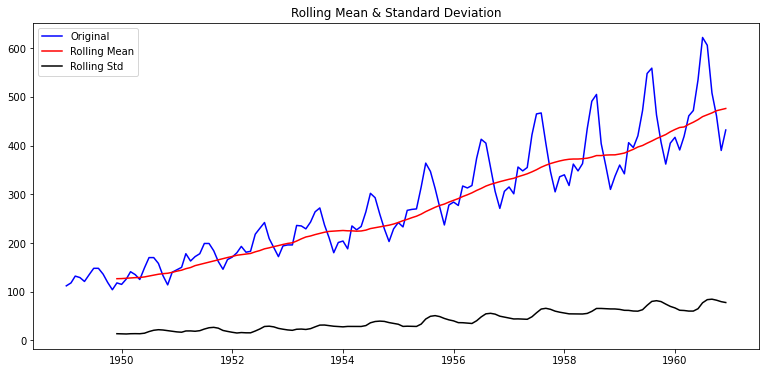

In [16]:
plot_rolling_statistics(ts2, window=12)

### 시계열 안정성(Stationarity)의 통계적 분석 
* 데이터셋(ts1): Daily Minimum Temperatures in Melbourne
* 데이터셋(ts2): International airline passengers

#### Augmented Dickey-Fuller Test
[ADF Test](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)는 `주어진 시계열 데이터가 안정적이지 않다`라는 '귀무가설(Null Hypothesis)를 세운 후, 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다. <br> 
ADF Test의 세부 알고리즘은 생략하고, statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 손쉽게 ADF Test의 결과를 이용한다. 

In [17]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


#### 유의확률(p-value)
[p-value](https://m.blog.naver.com/baedical/10109291879)의 정의는 귀무가설을 가정했을 때의 확률분포 상에서 현재의 관측보다 더 극단적인 관측이 나올 확률로서, 귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다. 이 값이 0.05 미만으로 매우 낮게 나온다면 p-value만큼의 오류 가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 된다. <br>

유의확률에 해당하는 p-value=0.000247이므로 `시계열이 안정적이지 않다(not stationary).`는 귀무가설은 기각된다.

In [18]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


유의확률(p-value)=0.991880이므로 1에 가깝다. 귀무가설을 기각할 수 없다. 

In [19]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Stationary한 시계열 가공

#### 로그함수 변환

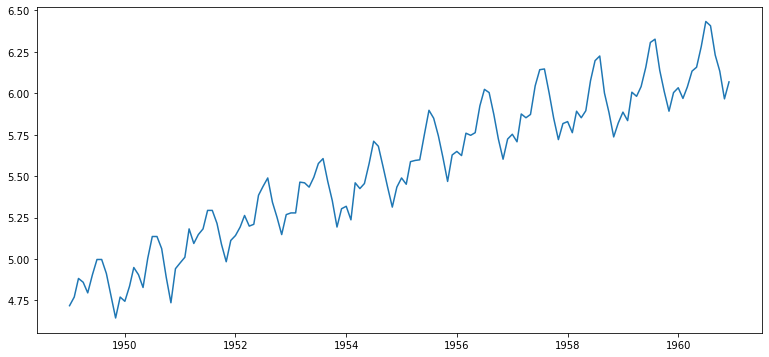

In [20]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [21]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### Moving average 제거 - 추세(Trend) 상쇄하기
시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 합니다. 이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼줍니다.

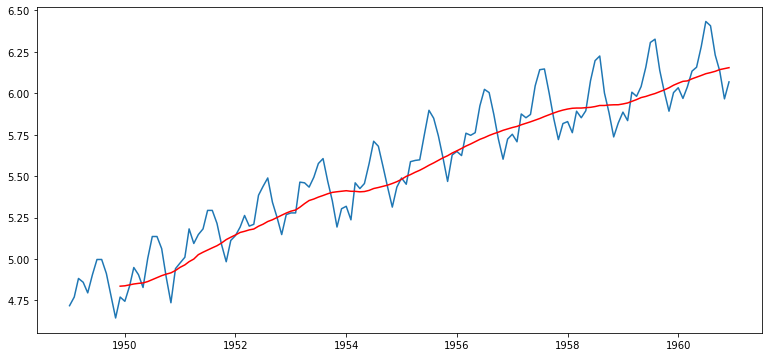

In [22]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [24]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

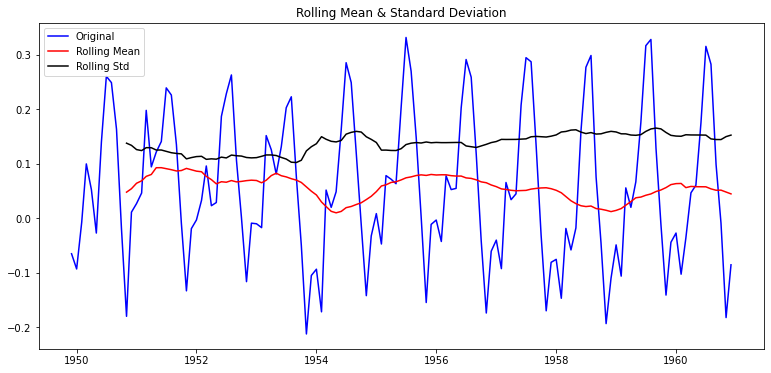

In [25]:
plot_rolling_statistics(ts_log_moving_avg)

In [26]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

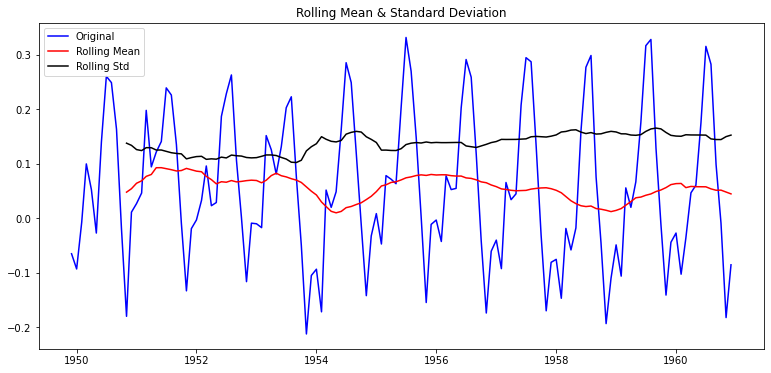

In [27]:
plot_rolling_statistics(ts_log_moving_avg)

p-value가 0.02 수준이고, 95% 이상의 confidence로 이 time series는 stationary하다고 볼 수 있습니다.

In [28]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


window=6으로 하면?

In [29]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


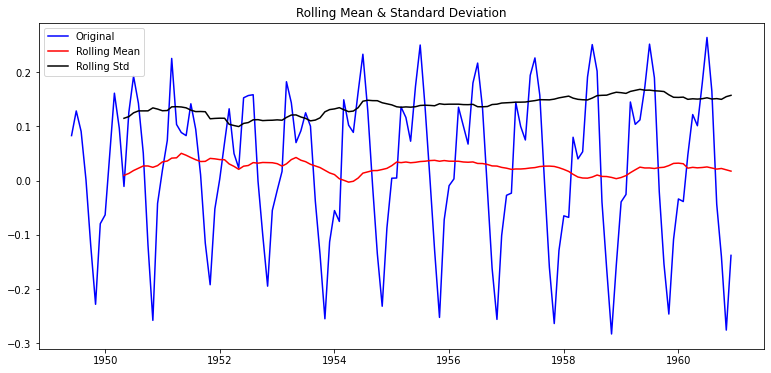

In [30]:
plot_rolling_statistics(ts_log_moving_avg_6)

Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없습니다. 

In [31]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같지만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요합니다. 

#### 차분(Differencing) - 계절성(Seasonality) 상쇄하기
Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소인 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다. 차분을 통해 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼줌으로써 패턴을 상쇄할 수 있습니다. 빼고 남은 값ㅇ느 현재 스텝값에서 직전 스텝값을 뺀 값이므로 이번 스텝에서 발생한 변화량을 의미합니다.

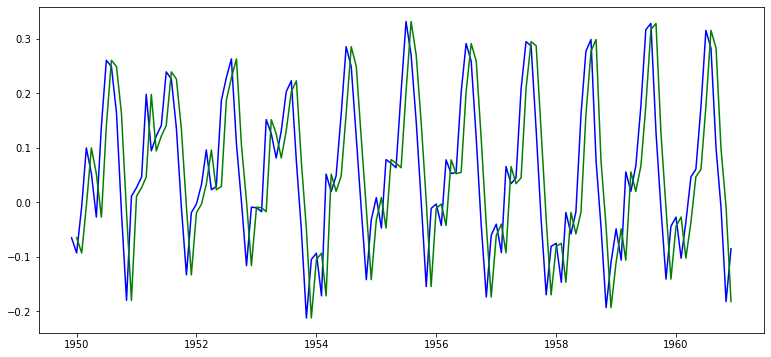

In [32]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

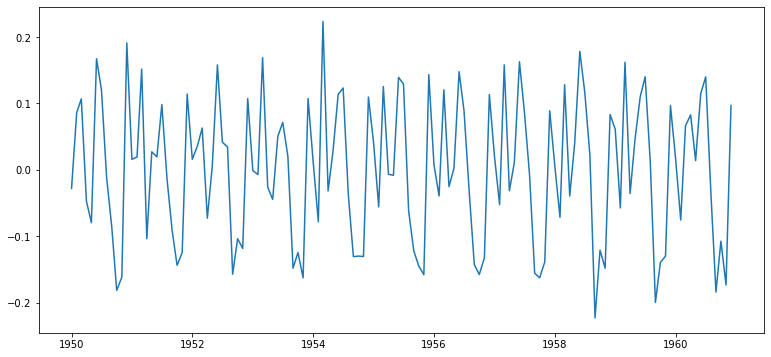

In [33]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)

plt.plot(ts_log_moving_avg_diff)

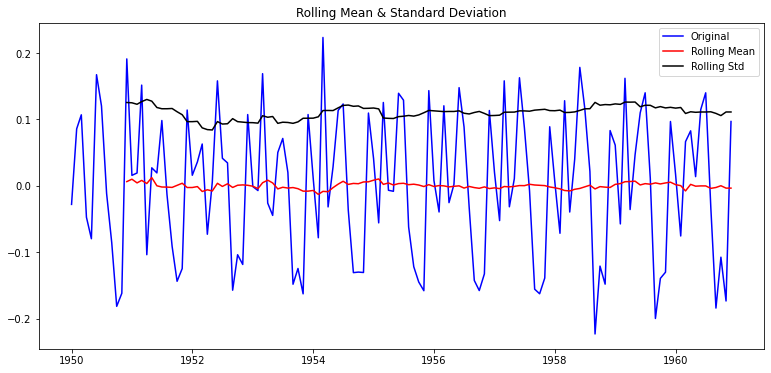

In [34]:
plot_rolling_statistics(ts_log_moving_avg_diff)

Trend를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 이전의 10% 정도까지로 줄어들었습니다. <br> 
추가적으로 2차, 3차 차분을 적용하면 p-value를 더욱 낮아질 가능성도 있습니다. 

In [35]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


#### 시계열 분해(Time series decomposition)
위에서 수행했던, 로그변환, moving average 제거, 차분 등을 거치지 않고 statsmodel 라이브러리의 seasonal_decompos 메소드를 통해 안정적인 시계열을 분리할 수 있습니다. 

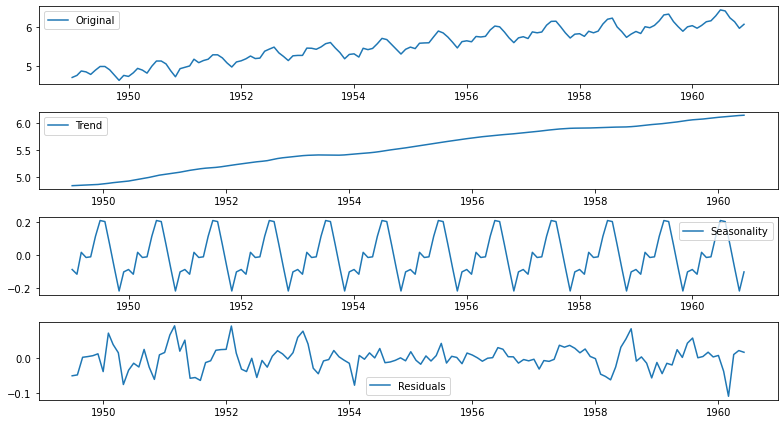

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

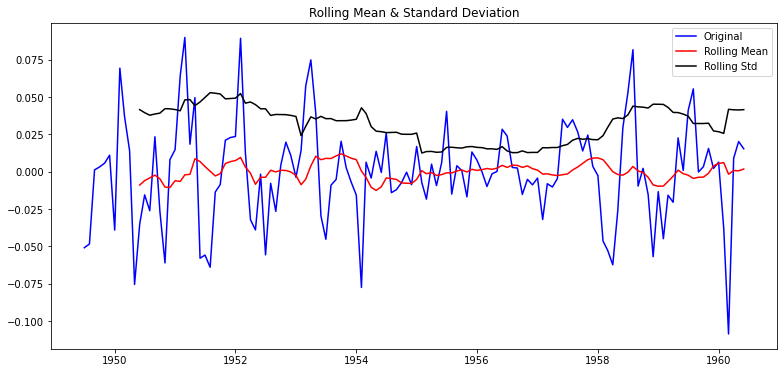

In [37]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 가집니다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있습니다.

In [38]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


---

## 프로젝트 - 삼성전자(2019.06 ~ 2020.06)
### STEP 1 : 시계열 데이터 준비
* 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
* 날짜별로 시작가(Open), 최고가(High), 최저가(Low), `종가(Close)`, 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 `Close`만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [39]:
!mv ~/Downloads/005930.KS.csv ~/aiffel/stock_prediction/data

mv: cannot stat '/home/aiffel-dj19/Downloads/005930.KS.csv': No such file or directory


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

In [41]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-14,43750.0,44150.0,43300.0,44000.0,41172.628906,9322873.0
2019-06-17,43750.0,44050.0,43400.0,43900.0,41079.062500,11890424.0
2019-06-18,43750.0,44500.0,43650.0,44350.0,41500.144531,7994928.0
2019-06-19,45450.0,45450.0,45000.0,45350.0,42435.882813,10417690.0
2019-06-20,44850.0,45500.0,44850.0,45500.0,42576.242188,7147785.0


In [42]:
ts.head()

Date
2019-06-14    44000.0
2019-06-17    43900.0
2019-06-18    44350.0
2019-06-19    45350.0
2019-06-20    45500.0
Name: Close, dtype: float64

### STEP 2 : 각종 전처리 수행
* 결측치 처리
* 로그 변환

In [43]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [44]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

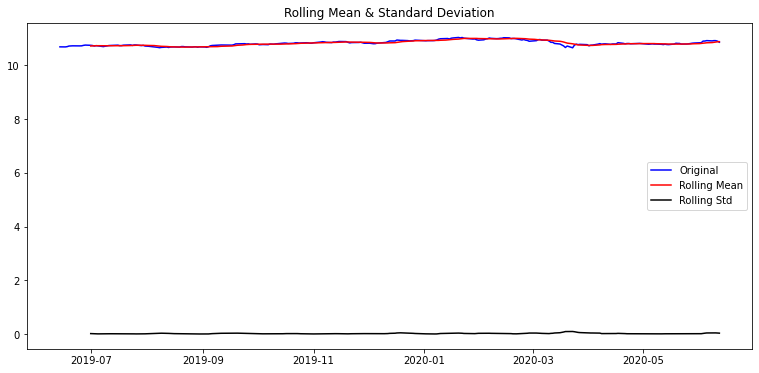

Results of Dickey-Fuller Test:
Test Statistic                  -2.037148
p-value                          0.270526
#Lags Used                       2.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


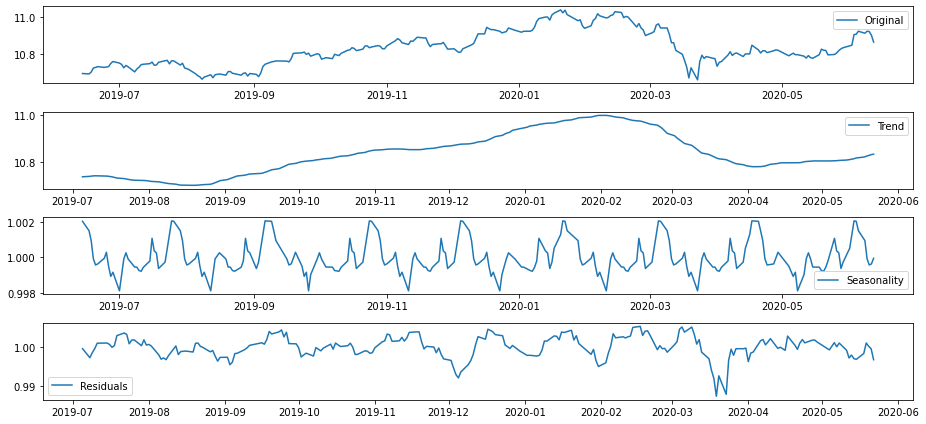

In [45]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [46]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.821532e+00
p-value                        4.171968e-07
#Lags Used                     3.000000e+00
Number of Observations Used    2.130000e+02
Critical Value (1%)           -3.461429e+00
Critical Value (5%)           -2.875207e+00
Critical Value (10%)          -2.574054e+00
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

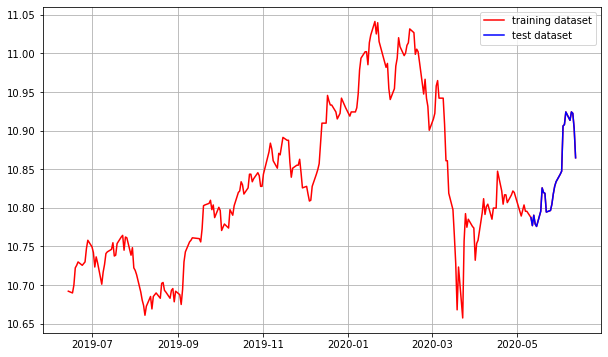

In [47]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기
* ACF, PACF 그려보기 -> p,q 구하기
* 차분 안정성 확인 -> d 구하기
![image.png](attachment:f06bde83-2fe9-473b-a839-4075dd1f8b99.png)
AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d입니다. 일반적으로 P,Q 를 간결의 원칙에 따라, P <3 , Q < 3으로 선택하는 것이 이상적입니다. 모형 개수가 증가하면 예측 모형이 복잡해질 뿐 아니라 추정의 효율성도 떨어지기 때에, 모수의 개수가 적은 모형이 좋습니다. 또한, p + q < 2, p x q = 0 인 값들을 많이 사용합니다. (둘중 하나의 모수가 0이라는 것은 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 하나의 모수를 0으로 설정한다) <br> 
그래프를 해석할때, lag(x좌표) =0 인 지점은 읽지 않고 어느 지점 부터 구간안에 들어가는지를 파악하면 됩니다. ACF가 lag=4에서 절단점을 가지고(절단점-1= 3 = q), PACF는 LAG가 4(절단점 -1 = p=3)이후에 절단점을 가집니다. 
* 참고 블로그: https://hwao-story.tistory.com/13

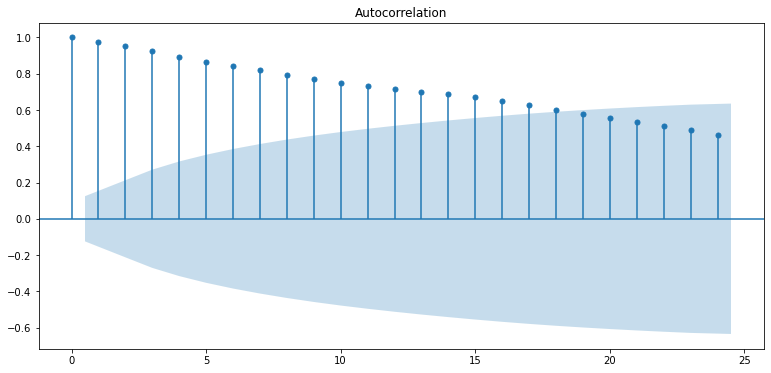

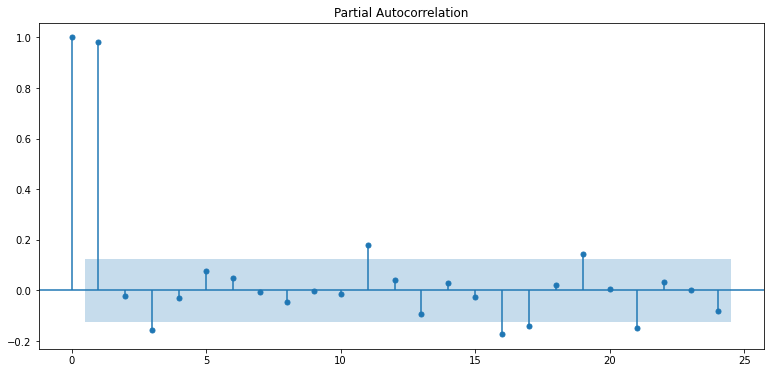

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

1~3되기 전즘이 절단점에 해당하는 것을 알 수 있습니다.

Results of Dickey-Fuller Test:
Test Statistic                -9.351169e+00
p-value                        8.288199e-16
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64
------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -7.826486e+00
p-value                        6.461118e-12
#Lags Used                     1.400000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64


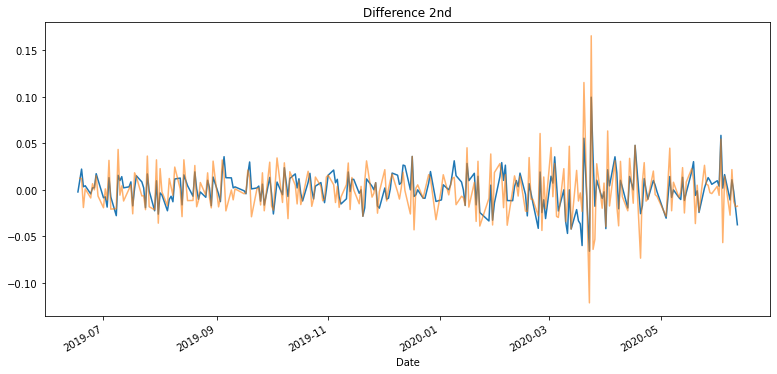

In [49]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)
print('------------------------------------')

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd', alpha = 0.6) # alpha값으로 투명도 주기

augmented_dickey_fuller_test(diff_2)

### STEP 6 : ARIMA 모델 훈련과 테스트
* ARIMA 모델 빌드와 훈련
* 모델 테스트 및 플로팅
* 최종 예측 모델 정확도 측정(MAPE)

In [50]:
# 아래 ARIMA model.fit할 때 warning 메세지 뜸. => 무시해버리기 
import warnings 
warnings.filterwarnings(action='ignore')

In [51]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 561.293
Method:                       css-mle   S.D. of innovations              0.019
Date:                Fri, 05 Mar 2021   AIC                          -1116.587
Time:                        05:21:50   BIC                          -1106.392
Sample:                             1   HQIC                         -1112.470
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.001      0.376      0.707      -0.002       0.003
ar.L1.D.Close    -0.0297      0.067     -0.443      0.658      -0.161       0.102
                                    Root

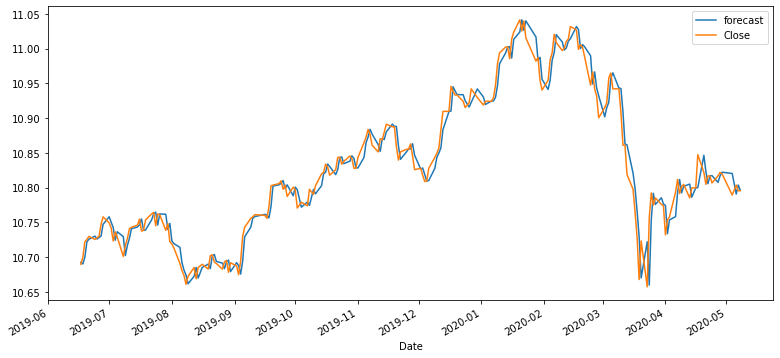

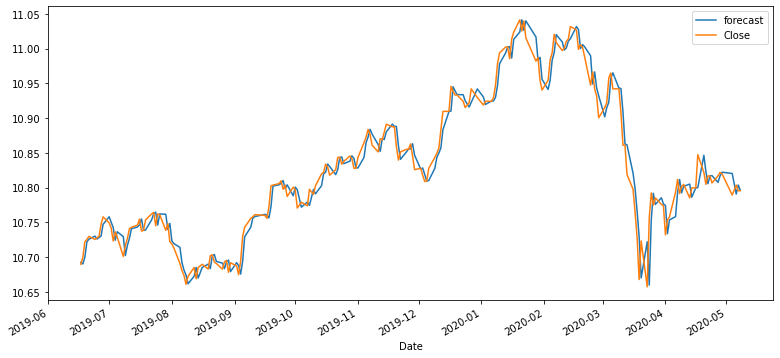

In [52]:
fitted_m.plot_predict()

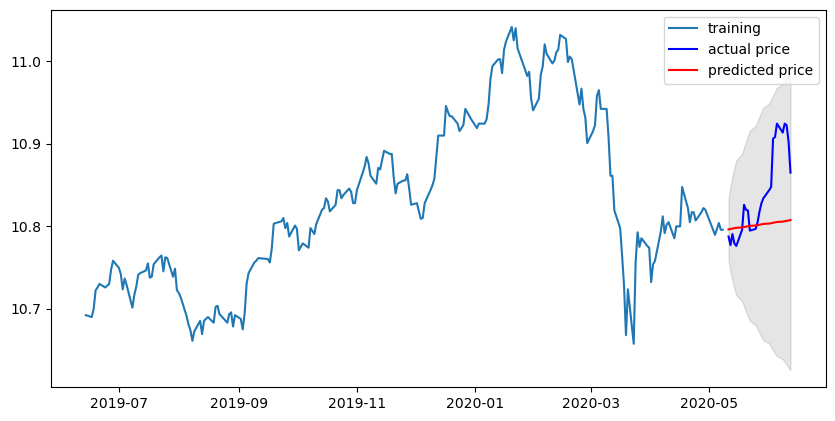

In [53]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10243491.599532157
MAE:  2330.1074513957224
RMSE:  3200.5455159288326
MAPE: 4.36%


---
## 프로젝트 - 현대자동차(2019.06 ~ 2020.06)
### STEP 1 : 시계열 데이터 준비
* 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
* 날짜별로 시작가(Open), 최고가(High), 최저가(Low), `종가(Close)`, 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 `Close`만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [55]:
!mv ~/Downloads/005930.KS.csv ~/aiffel/stock_prediction/data

mv: cannot stat '/home/aiffel-dj19/Downloads/005930.KS.csv': No such file or directory


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

In [57]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-14,43750.0,44150.0,43300.0,44000.0,41172.628906,9322873.0
2019-06-17,43750.0,44050.0,43400.0,43900.0,41079.062500,11890424.0
2019-06-18,43750.0,44500.0,43650.0,44350.0,41500.144531,7994928.0
2019-06-19,45450.0,45450.0,45000.0,45350.0,42435.882813,10417690.0
2019-06-20,44850.0,45500.0,44850.0,45500.0,42576.242188,7147785.0


In [58]:
ts.head()

Date
2019-06-14    44000.0
2019-06-17    43900.0
2019-06-18    44350.0
2019-06-19    45350.0
2019-06-20    45500.0
Name: Close, dtype: float64

### STEP 2 : 각종 전처리 수행
* 결측치 처리
* 로그 변환

In [59]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [60]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

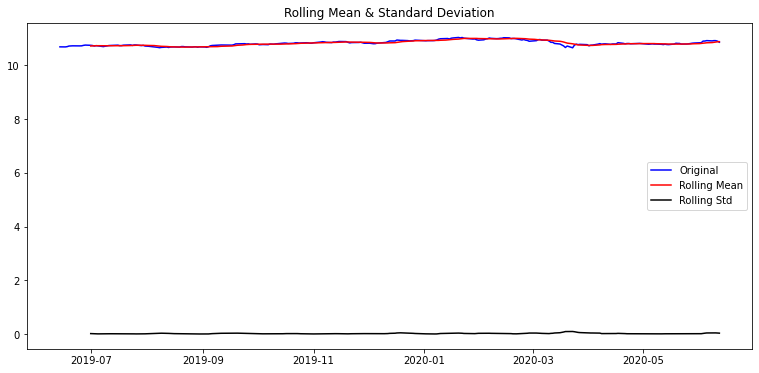

Results of Dickey-Fuller Test:
Test Statistic                  -2.037148
p-value                          0.270526
#Lags Used                       2.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


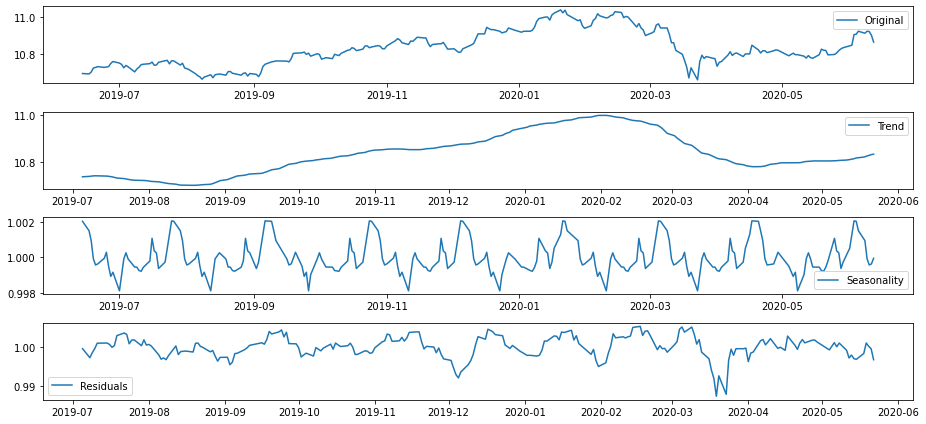

In [61]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [62]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.821532e+00
p-value                        4.171968e-07
#Lags Used                     3.000000e+00
Number of Observations Used    2.130000e+02
Critical Value (1%)           -3.461429e+00
Critical Value (5%)           -2.875207e+00
Critical Value (10%)          -2.574054e+00
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

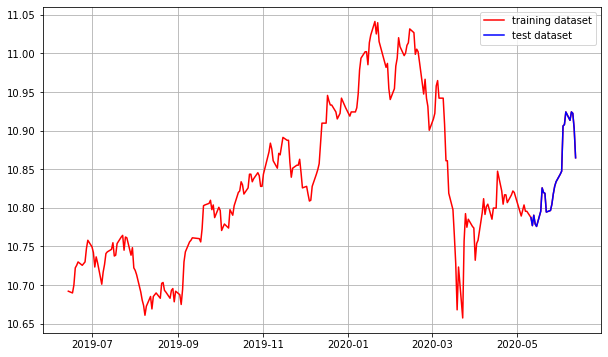

In [63]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기
* ACF, PACF 그려보기 -> p,q 구하기
* 차분 안정성 확인 -> d 구하기
![image.png](attachment:f06bde83-2fe9-473b-a839-4075dd1f8b99.png)
AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d입니다. 일반적으로 P,Q 를 간결의 원칙에 따라, P <3 , Q < 3으로 선택하는 것이 이상적입니다. 모형 개수가 증가하면 예측 모형이 복잡해질 뿐 아니라 추정의 효율성도 떨어지기 때에, 모수의 개수가 적은 모형이 좋습니다. 또한, p + q < 2, p x q = 0 인 값들을 많이 사용합니다. (둘중 하나의 모수가 0이라는 것은 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 하나의 모수를 0으로 설정한다) <br> 
그래프를 해석할때, lag(x좌표) =0 인 지점은 읽지 않고 어느 지점 부터 구간안에 들어가는지를 파악하면 됩니다. ACF가 lag=4에서 절단점을 가지고(절단점-1= 3 = q), PACF는 LAG가 4(절단점 -1 = p=3)이후에 절단점을 가집니다. 
* 참고 블로그: https://hwao-story.tistory.com/13

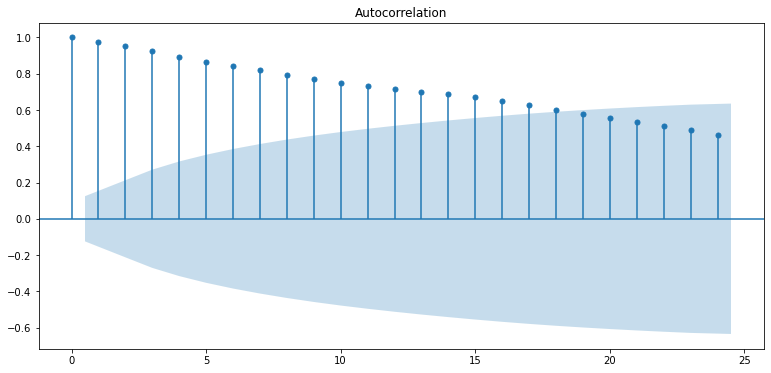

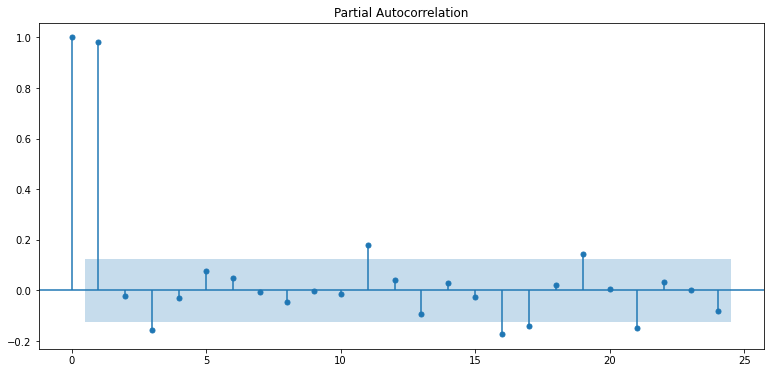

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -9.351169e+00
p-value                        8.288199e-16
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64
------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -7.826486e+00
p-value                        6.461118e-12
#Lags Used                     1.400000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64


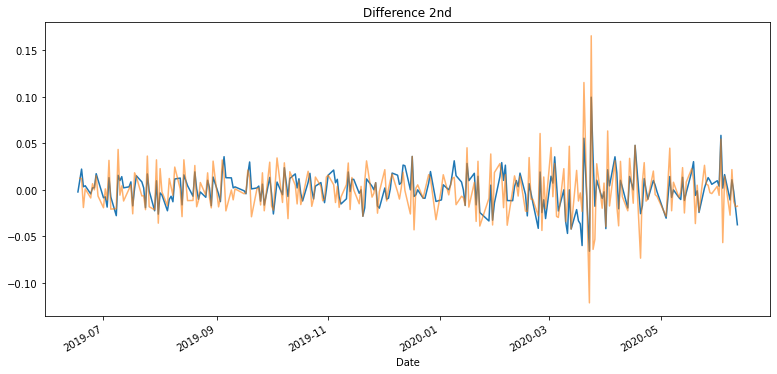

In [65]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)
print('------------------------------------')

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd', alpha = 0.6) # alpha값으로 투명도 주기

augmented_dickey_fuller_test(diff_2)

### STEP 6 : ARIMA 모델 훈련과 테스트
* ARIMA 모델 빌드와 훈련
* 모델 테스트 및 플로팅
* 최종 예측 모델 정확도 측정(MAPE)

In [66]:
# 아래 ARIMA model.fit할 때 warning 메세지 뜸. => 무시해버리기 
import warnings 
warnings.filterwarnings(action='ignore')

In [67]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 561.293
Method:                       css-mle   S.D. of innovations              0.019
Date:                Fri, 05 Mar 2021   AIC                          -1116.587
Time:                        05:21:52   BIC                          -1106.392
Sample:                             1   HQIC                         -1112.470
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.001      0.376      0.707      -0.002       0.003
ar.L1.D.Close    -0.0297      0.067     -0.443      0.658      -0.161       0.102
                                    Root

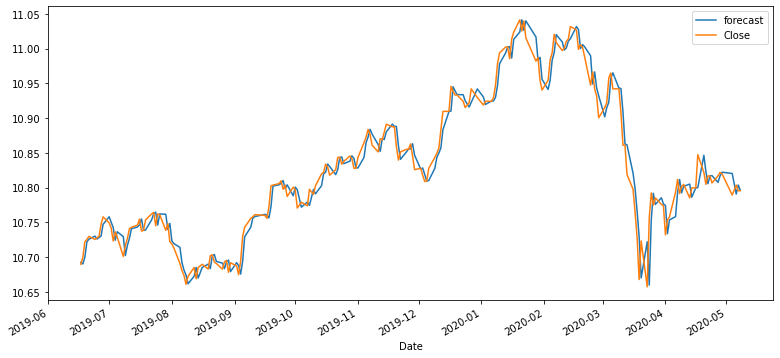

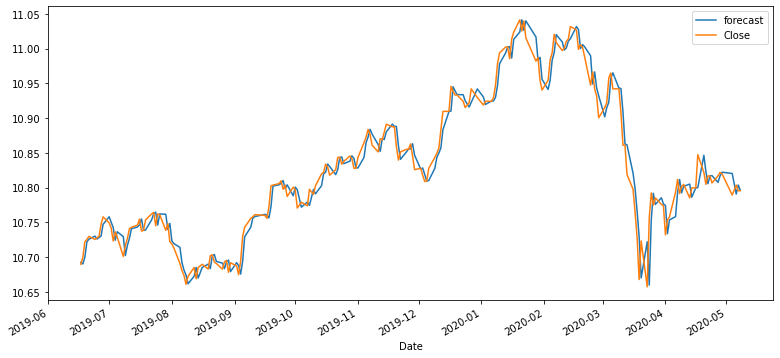

In [68]:
fitted_m.plot_predict()

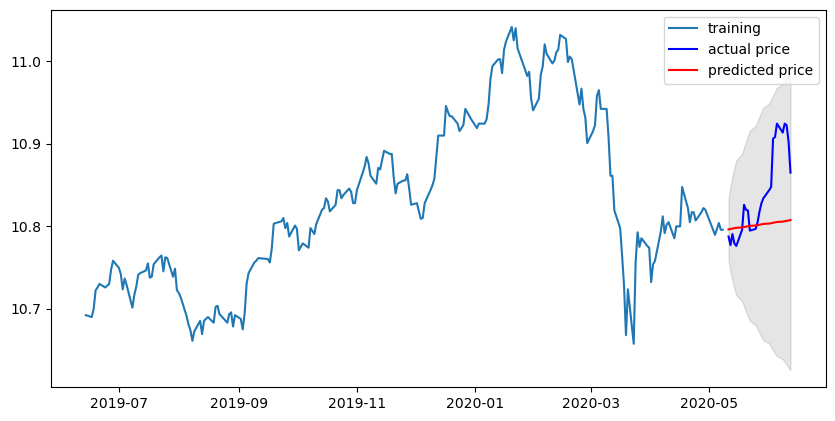

In [69]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  10243491.599532157
MAE:  2330.1074513957224
RMSE:  3200.5455159288326
MAPE: 4.36%


---
## 프로젝트 - 포스코(2019.06 ~ 2020.06)
### STEP 1 : 시계열 데이터 준비
* 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
* 날짜별로 시작가(Open), 최고가(High), 최저가(Low), `종가(Close)`, 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 `Close`만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [71]:
!mv ~/Downloads/PKX.csv ~/aiffel/stock_prediction/data

mv: cannot stat '/home/aiffel-dj19/Downloads/PKX.csv': No such file or directory


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PKX.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

In [73]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-14,50.580002,50.580002,50.070000,50.230000,50.230000,204600
2019-06-17,49.689999,49.970001,49.340000,49.900002,49.900002,215000
2019-06-18,51.020000,52.070000,51.020000,51.700001,51.700001,180500
2019-06-19,51.820000,52.130001,51.549999,52.029999,52.029999,116500
2019-06-20,53.029999,53.029999,52.139999,52.490002,52.490002,147000


In [74]:
ts.head()

Date
2019-06-14    50.230000
2019-06-17    49.900002
2019-06-18    51.700001
2019-06-19    52.029999
2019-06-20    52.490002
Name: Close, dtype: float64

### STEP 2 : 각종 전처리 수행
* 결측치 처리
* 로그 변환

In [75]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [76]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

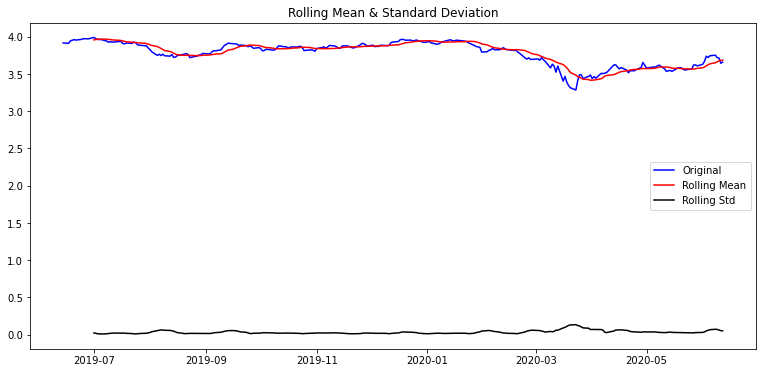

Results of Dickey-Fuller Test:
Test Statistic                  -1.577962
p-value                          0.494654
#Lags Used                       6.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


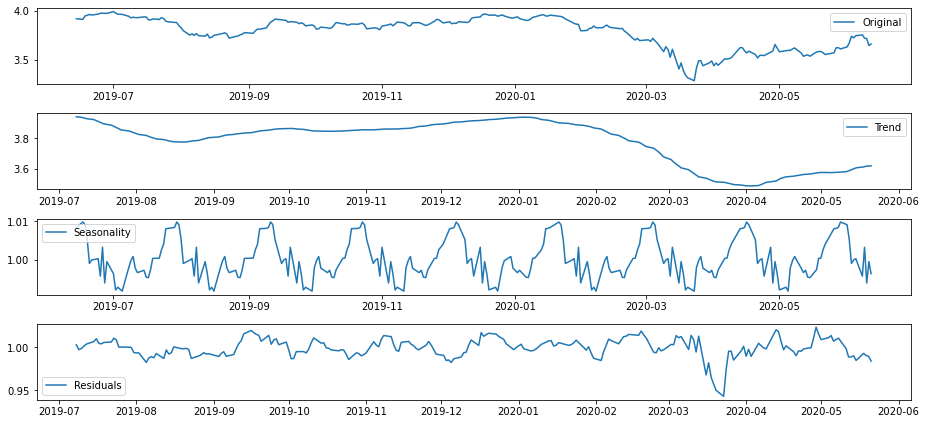

In [77]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [78]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.890839
p-value                          0.000036
#Lags Used                       6.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

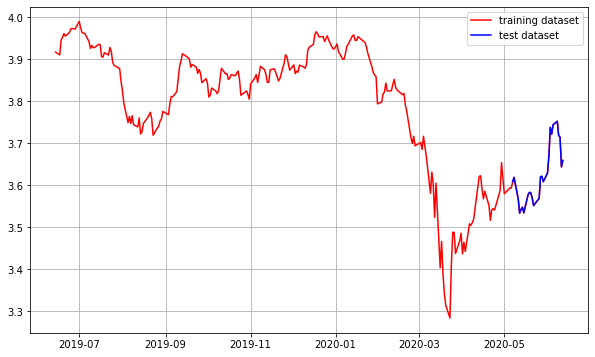

In [79]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기
* ACF, PACF 그려보기 -> p,q 구하기
* 차분 안정성 확인 -> d 구하기
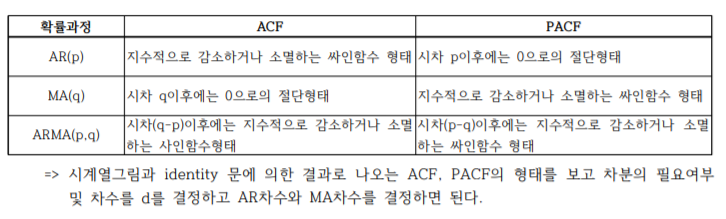
AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d입니다. 일반적으로 P,Q 를 간결의 원칙에 따라, P <3 , Q < 3으로 선택하는 것이 이상적입니다. 모형 개수가 증가하면 예측 모형이 복잡해질 뿐 아니라 추정의 효율성도 떨어지기 때에, 모수의 개수가 적은 모형이 좋습니다. 또한, p + q < 2, p x q = 0 인 값들을 많이 사용합니다. (둘중 하나의 모수가 0이라는 것은 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 하나의 모수를 0으로 설정한다) <br> 
그래프를 해석할때, lag(x좌표) =0 인 지점은 읽지 않고 어느 지점 부터 구간안에 들어가는지를 파악하면 됩니다. ACF가 lag=4에서 절단점을 가지고(절단점-1= 3 = q), PACF는 LAG가 4(절단점 -1 = p=3)이후에 절단점을 가집니다. 
* 참고 블로그: https://hwao-story.tistory.com/13

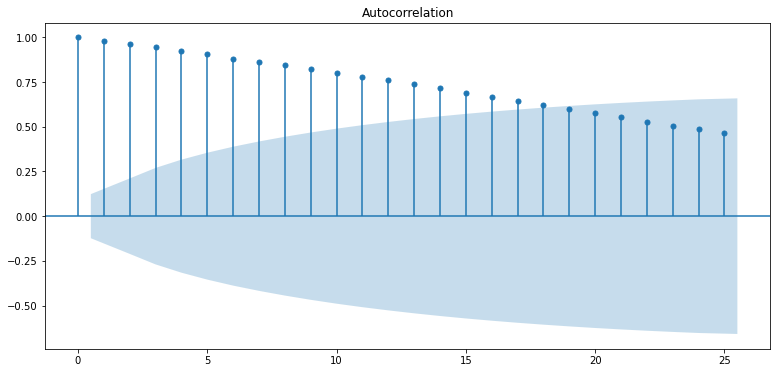

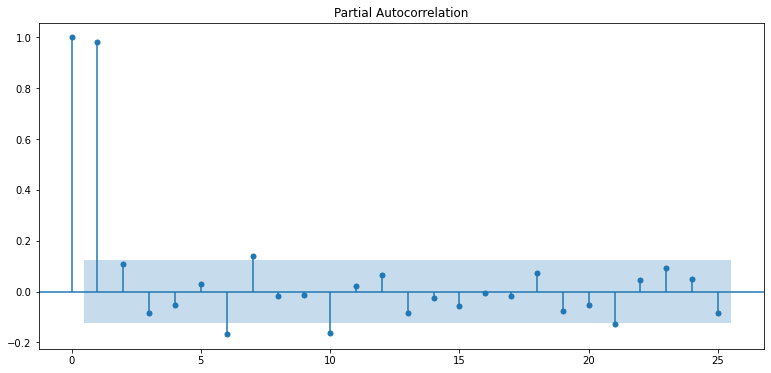

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

2~3즘에 절단점에 들어가는 것을 확인할 수 있습니다. 

Results of Dickey-Fuller Test:
Test Statistic                -6.446312e+00
p-value                        1.562737e-08
#Lags Used                     5.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -7.848625e+00
p-value                        5.679705e-12
#Lags Used                     1.000000e+01
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


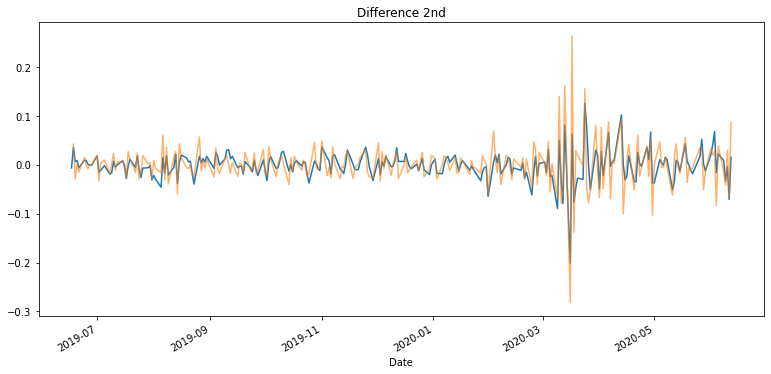

In [81]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)
print('------------------------------------')

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd', alpha = 0.6) # alpha값으로 투명도 주기

augmented_dickey_fuller_test(diff_2)

### STEP 6 : ARIMA 모델 훈련과 테스트
* ARIMA 모델 빌드와 훈련
* 모델 테스트 및 플로팅
* 최종 예측 모델 정확도 측정(MAPE)

In [82]:
# 아래 ARIMA model.fit할 때 warning 메세지 뜸. => 무시해버리기 
import warnings 
warnings.filterwarnings(action='ignore')

In [83]:
#하나씩 order에 들어가는 p,d,q의 값을 바꿔줬지만, 이러한 모수를 자동으로 찾아주는 라이브러리가 있습니다. 
from pmdarima.arima import auto_arima

#calculating p,d,q values for ARIMA based on training data 
#auto_arima process identifies the most optimal parameters for an ARIMA model
model_autoARIMA = auto_arima(train_data, start_p=1, start_q=8,
                      test='adf',       #type of root test: pp, adf, kpss
                      max_p=4, max_q=8, #max_p is the max value of AR and max_q is the max value of MA
                      m=12,              #annual data
                      d=None,         
                      seasonal=False, 
                      start_P=1, start_Q=1,
                      D=0,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

#summary to choose p,d,q value and update it accordingly in arima function
print(model_autoARIMA.summary())

Fit ARIMA: order=(1, 1, 8); AIC=-948.442, BIC=-910.865, Fit time=2.769 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-947.849, BIC=-941.016, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-950.704, BIC=-940.456, Fit time=0.028 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-949.881, BIC=-939.633, Fit time=0.015 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-950.470, BIC=-936.805, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-949.578, BIC=-935.913, Fit time=0.069 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-948.990, BIC=-931.909, Fit time=0.125 seconds
Total fit time: 3.058 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 478.352
Method:                       css-mle   S.D. of innovations              0.029
Date:                Fri, 05 Mar 2021   AIC                           -950.704
Time:                 

In [84]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 478.352
Method:                       css-mle   S.D. of innovations              0.029
Date:                Fri, 05 Mar 2021   AIC                           -950.704
Time:                        05:21:58   BIC                           -940.456
Sample:                             1   HQIC                          -946.568
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0014      0.002     -0.854      0.393      -0.005       0.002
ar.L1.D.Close    -0.1458      0.066     -2.216      0.027      -0.275      -0.017
                                    Root

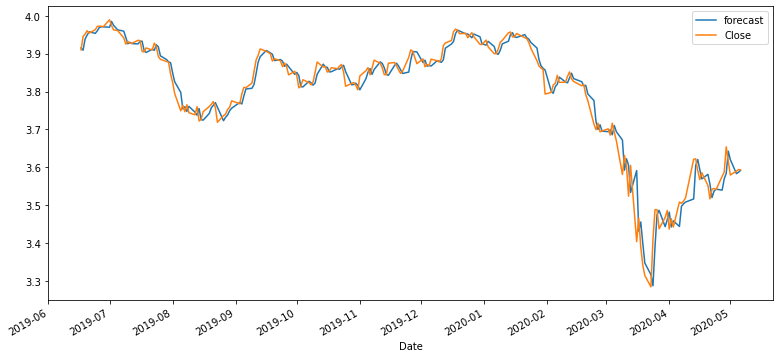

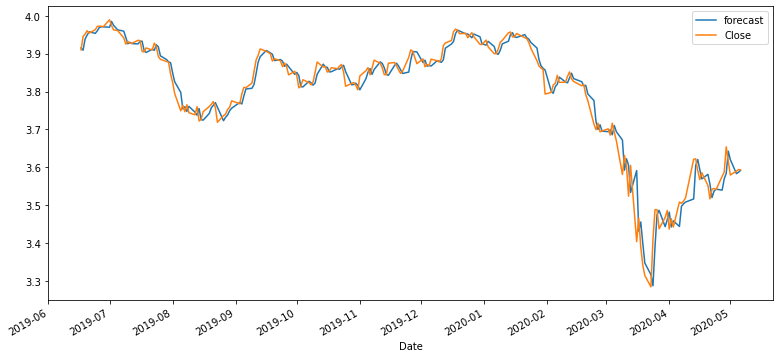

In [85]:
fitted_m.plot_predict()

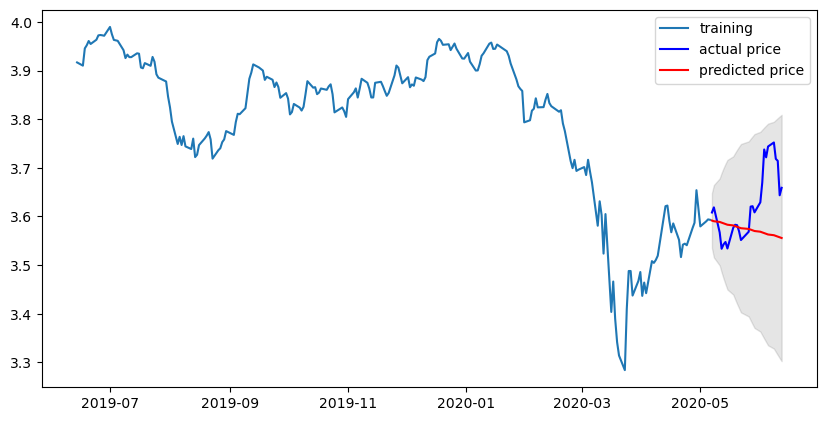

In [86]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  12.333654706020052
MAE:  2.5953363922260526
RMSE:  3.5119303390044703
MAPE: 6.55%


---
## 프로젝트 - 포스코(1994 ~ 2020)
### STEP 1 : 시계열 데이터 준비
* 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
* 날짜별로 시작가(Open), 최고가(High), 최저가(Low), `종가(Close)`, 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 `Close`만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [88]:
!mv ~/Downloads/PKX_1994.csv ~/aiffel/stock_prediction/data

mv: cannot stat '/home/aiffel-dj19/Downloads/PKX_1994.csv': No such file or directory


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PKX_1994.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

In [90]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-10-14,37.750,37.875,37.000,37.25,29.721077,1559900
1994-10-17,36.750,36.750,35.500,35.50,28.324785,564100
1994-10-18,35.750,35.750,35.625,35.75,28.524250,191200
1994-10-19,35.625,35.625,35.000,35.00,27.925840,174100
1994-10-20,35.000,35.000,34.750,35.00,27.925840,96000


In [91]:
ts.head()

Date
1994-10-14    37.25
1994-10-17    35.50
1994-10-18    35.75
1994-10-19    35.00
1994-10-20    35.00
Name: Close, dtype: float64

### STEP 2 : 각종 전처리 수행
* 결측치 처리
* 로그 변환

In [92]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [93]:
# 로그 변환 시도 
ts_log = np.log(ts)

### STEP 3 : 시계열 안정성 분석
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

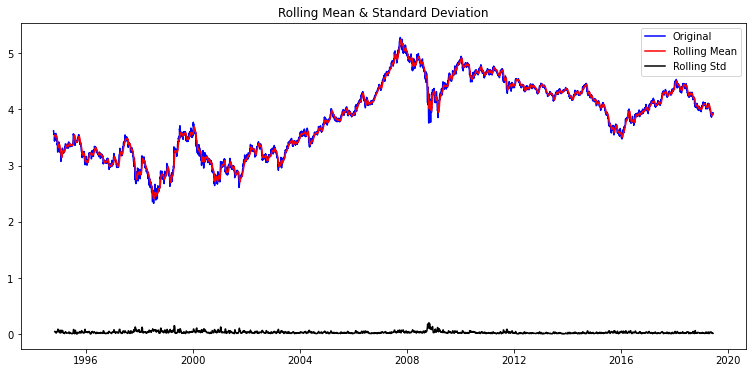

Results of Dickey-Fuller Test:
Test Statistic                   -1.546414
p-value                           0.510439
#Lags Used                       20.000000
Number of Observations Used    6188.000000
Critical Value (1%)              -3.431407
Critical Value (5%)              -2.862007
Critical Value (10%)             -2.567019
dtype: float64


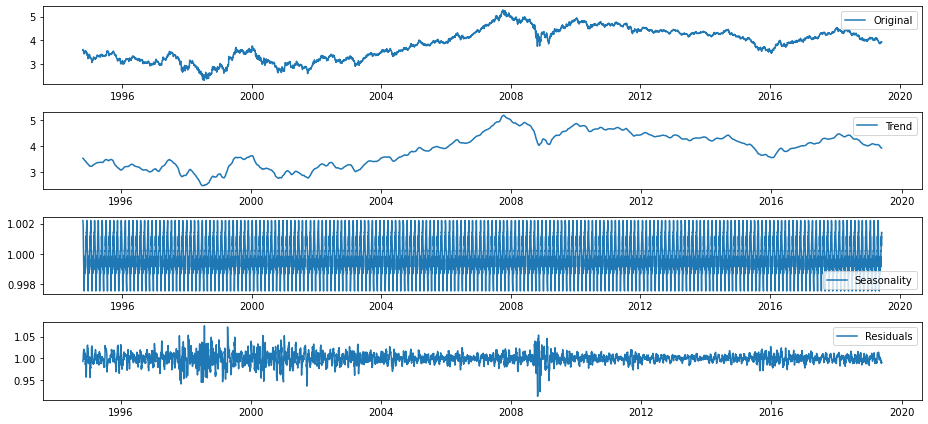

In [94]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [95]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -20.217215
p-value                           0.000000
#Lags Used                       30.000000
Number of Observations Used    6148.000000
Critical Value (1%)              -3.431414
Critical Value (5%)              -2.862010
Critical Value (10%)             -2.567020
dtype: float64


### STEP 4 : 학습, 테스트 데이터셋 생성

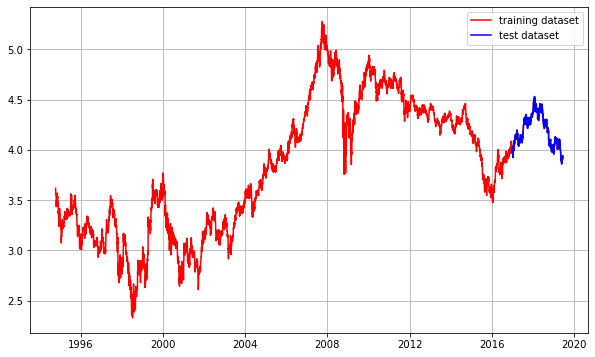

In [96]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기
* ACF, PACF 그려보기 -> p,q 구하기
* 차분 안정성 확인 -> d 구하기
![image.png](attachment:f06bde83-2fe9-473b-a839-4075dd1f8b99.png)
AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d입니다. 일반적으로 P,Q 를 간결의 원칙에 따라, P <3 , Q < 3으로 선택하는 것이 이상적입니다. 모형 개수가 증가하면 예측 모형이 복잡해질 뿐 아니라 추정의 효율성도 떨어지기 때에, 모수의 개수가 적은 모형이 좋습니다. 또한, p + q < 2, p x q = 0 인 값들을 많이 사용합니다. (둘중 하나의 모수가 0이라는 것은 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 하나의 모수를 0으로 설정한다) <br> 
그래프를 해석할때, lag(x좌표) =0 인 지점은 읽지 않고 어느 지점 부터 구간안에 들어가는지를 파악하면 됩니다. ACF가 lag=4에서 절단점을 가지고(절단점-1= 3 = q), PACF는 LAG가 4(절단점 -1 = p=3)이후에 절단점을 가집니다. 
* 참고 블로그: https://hwao-story.tistory.com/13

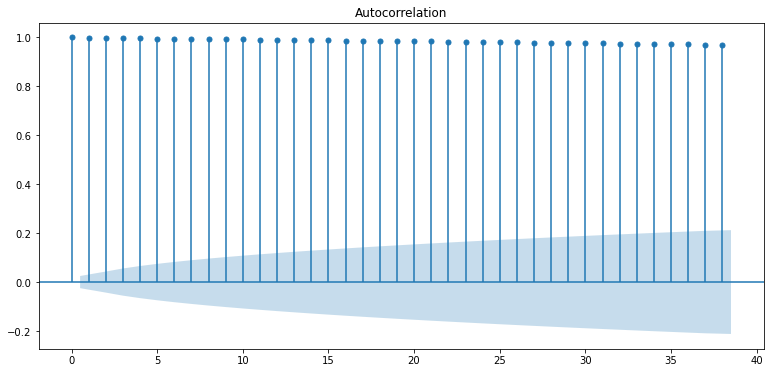

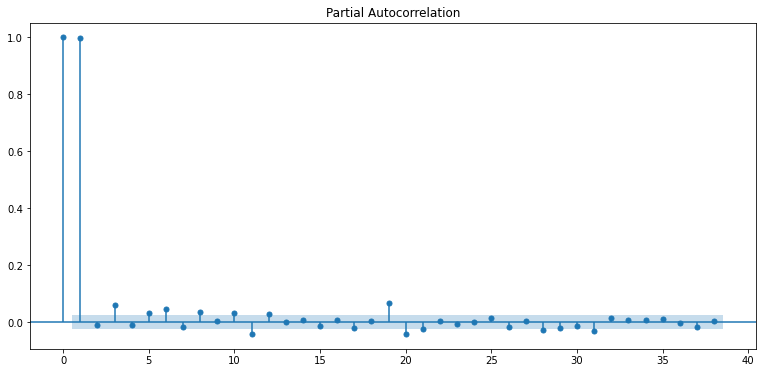

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

1~2정도에 절단점을 가지는 것을 알 수 있습니다.

Results of Dickey-Fuller Test:
Test Statistic                -1.785081e+01
p-value                        3.080021e-30
#Lags Used                     1.900000e+01
Number of Observations Used    6.188000e+03
Critical Value (1%)           -3.431407e+00
Critical Value (5%)           -2.862007e+00
Critical Value (10%)          -2.567019e+00
dtype: float64
------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -23.408376
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    6172.000000
Critical Value (1%)              -3.431410
Critical Value (5%)              -2.862008
Critical Value (10%)             -2.567019
dtype: float64
------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -30.604419
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    6171.000000
Critical Value (1%)   

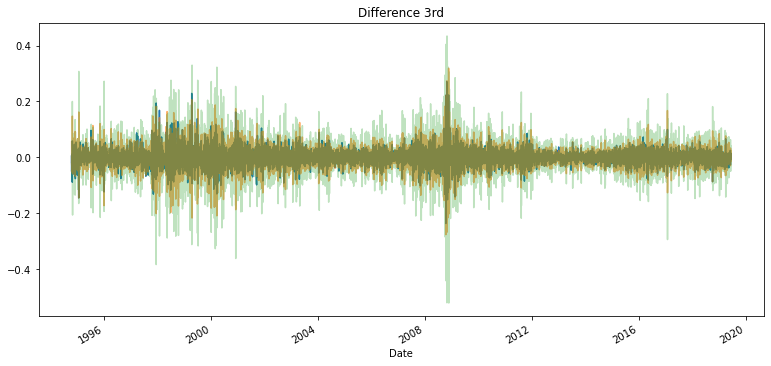

In [98]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)
print('------------------------------------')

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd', alpha = 0.6) # alpha값으로 투명도 주기

augmented_dickey_fuller_test(diff_2)
print('------------------------------------')

# 혹시 필요한 경우 3차 차분 구하기
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 3rd', alpha = 0.3) # alpha값으로 투명도 주기

augmented_dickey_fuller_test(diff_3)

### STEP 6 : ARIMA 모델 훈련과 테스트
* ARIMA 모델 빌드와 훈련
* 모델 테스트 및 플로팅
* 최종 예측 모델 정확도 측정(MAPE)

In [99]:
# 아래 ARIMA model.fit할 때 warning 메세지 뜸. => 무시해버리기 
import warnings 
warnings.filterwarnings(action='ignore')

In [100]:
#하나씩 order에 들어가는 p,d,q의 값을 바꿔줬지만, 이러한 모수를 자동으로 찾아주는 라이브러리가 있습니다. 
from pmdarima.arima import auto_arima

#calculating p,d,q values for ARIMA based on training data 
#auto_arima process identifies the most optimal parameters for an ARIMA model
model_autoARIMA = auto_arima(train_data, start_p=1, start_q=8,
                      test='adf',       #type of root test: pp, adf, kpss
                      max_p=4, max_q=8, #max_p is the max value of AR and max_q is the max value of MA
                      m=12,              #annual data
                      d=None,         
                      seasonal=False, 
                      start_P=1, start_Q=1,
                      D=0,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

#summary to choose p,d,q value and update it accordingly in arima function
print(model_autoARIMA.summary())

Fit ARIMA: order=(1, 1, 8); AIC=-23919.997, BIC=-23847.086, Fit time=3.342 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-23900.969, BIC=-23887.712, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-23899.528, BIC=-23879.644, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-23899.590, BIC=-23879.705, Fit time=0.019 seconds
Fit ARIMA: order=(0, 1, 8); AIC=-23921.585, BIC=-23855.303, Fit time=1.743 seconds
Fit ARIMA: order=(0, 1, 7); AIC=-23923.412, BIC=-23863.758, Fit time=1.034 seconds
Fit ARIMA: order=(1, 1, 7); AIC=-23921.983, BIC=-23855.701, Fit time=3.093 seconds
Fit ARIMA: order=(0, 1, 6); AIC=-23919.658, BIC=-23866.632, Fit time=0.790 seconds
Total fit time: 10.087 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5587
Model:                 ARIMA(0, 1, 7)   Log Likelihood               11970.706
Method:                       css-mle   S.D. of innovations         

In [101]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(0, 1, 7)) # p, d, q  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5587
Model:                 ARIMA(0, 1, 7)   Log Likelihood               11970.706
Method:                       css-mle   S.D. of innovations              0.028
Date:                Fri, 05 Mar 2021   AIC                         -23923.412
Time:                        05:22:12   BIC                         -23863.758
Sample:                             1   HQIC                        -23902.621
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.418e-05      0.000      0.222      0.824      -0.001       0.001
ma.L1.D.Close     0.0106      0.013      0.794      0.427      -0.016       0.037
ma.L2.D.Close    -0.0533      0.013     

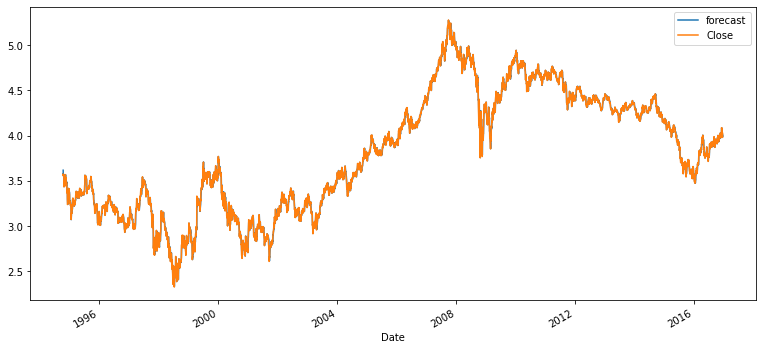

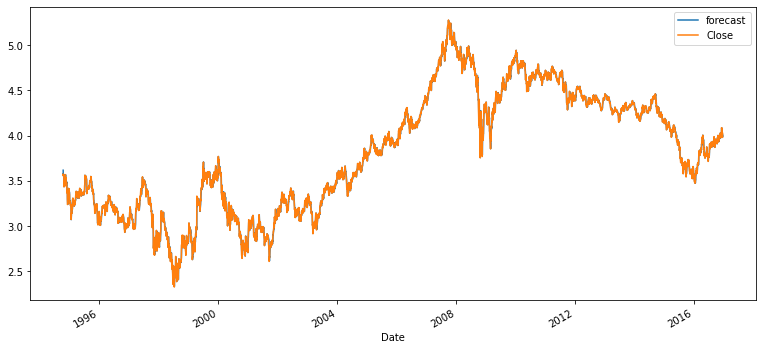

In [102]:
fitted_m.plot_predict()

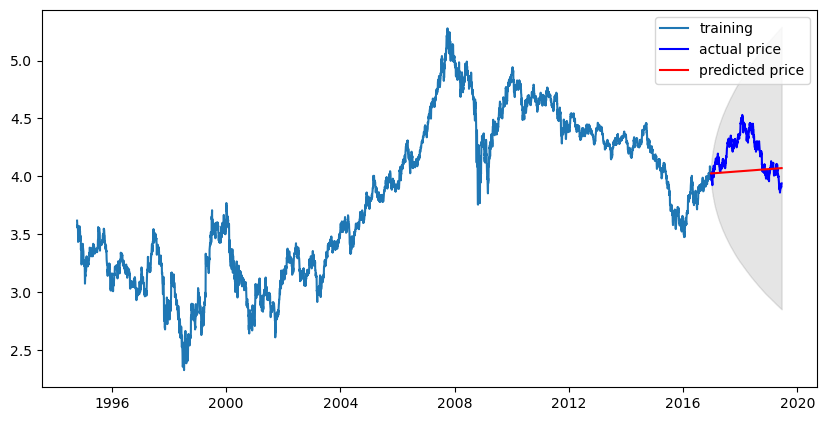

In [103]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

최종적인 모델의 오차율을 계산하려면, 그동안 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야합니다. np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산합니다.

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  211.93779608207885
MAE:  11.311922615272353
RMSE:  14.558083530536527
MAPE: 15.34%


## 루브릭 
* 시계열의 안정성이 충분히 확인되었는가?
    - 플로팅과 adfuller 메소드가 모두 적절히 사용되었음(O) 
* ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?
    - p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨(O)

* 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?
    - `3개 이상 종목이 MAPE 10% 미만`의 정확도로 예측됨(O)

## 회고 
* 어려웠던 점: 시계열 데이터를 이해하는 부분이 어려웠습니다. 그리고 ARIMA이라는 모델이 지금까지 배워온 모델하고 다른 느낌이여서 낯설기 때문에 더 개념 숙지가 오래 걸리기도 했습니다. 
* 추후 공부할 점: 주가 예측은 모델을 무엇을 쓰냐에 따라 어떤 패턴에 더 수익률을 낼 수 있는지가 다르다고 알고 있습니다. 페이스북에서 발표한 Prophet이나 LSTM과 같은 딥러닝 기법으로도 구현이 가능하니 해당 모델들로도 학습시켜 한번 자동 주식 매수.. 기능을 만들어서 돌려보고 싶습니다.  
* 새롭게 시도한 점: 논문 코드 활용 
https://paperswithcode.com/paper/stock-price-correlation-coefficient  해당 사이트에서 stock price prediction using ARIMA에 대한 논문을 찾았습니다. 논문 코드를 보니까 노드와 같았고, 거기서 p, d, q를 Auto_arima를 사용하는 점을 알 수 있었습니다. 처음에 값을 일일이 넣어줬는데 약간 하이퍼파라미터를 찾아주는 교차검증처럼 매우 편했습니다. 
* 참고 github: https://github.com/morpheu513/NASDAQ_stock_analysis